# Свертка данных. Ядерное сглаживание.

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1.5
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Исходные данные

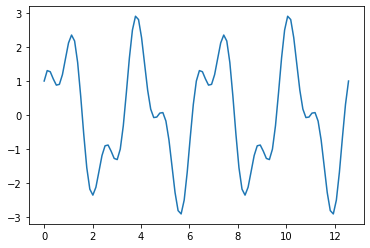

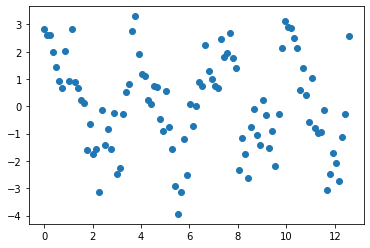

In [13]:
x = np.linspace(0, np.pi * 4, 101)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

n = len(x)

#print (x/(np.pi * 2))

yd = np.zeros(len(x))

plt.plot(x, y);
Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta
y_av = np.sum(y)/len(x)

plt.figure ()

plt.plot (x, yd, 'o');

2 2.306741191162061 2.3067411911620614


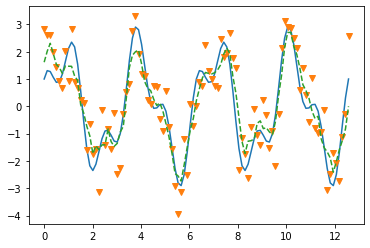

In [14]:
Conv = np.zeros ((len(x)))
W = np.zeros ((2*len(x)))

W [-2] = 1./5
W [-1] = 1./5.
W [0] = 1./5.
W [1] = 1./5.
W [2] = 1./5.

for i in range (0, n-1):

    Conv [i] = 0.
    
    for k in range (0, n-1):

        Conv[i] = Conv[i] + yd[k]*W[i-k]

        
        
for i in range (2, 3):
        print (i, Conv[i], np.sum(yd[(i-2):(i+3)])/5.)

plt.figure ()
plt.plot (x, y)
plt.plot (x, yd, 'v')
plt.plot (x, Conv, '--')

In [15]:
for x in ww:
    print(x)

[0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

# Автокорреляция

## Исходные данные

[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96 1.02 1.08 1.14 1.2  1.26 1.32 1.38 1.44 1.5  1.56 1.62
 1.68 1.74 1.8  1.86 1.92 1.98 2.04 2.1  2.16 2.22 2.28 2.34 2.4  2.46
 2.52 2.58 2.64 2.7  2.76 2.82 2.88 2.94 3.   3.06 3.12 3.18 3.24 3.3
 3.36 3.42 3.48 3.54 3.6  3.66 3.72 3.78 3.84 3.9  3.96 4.02 4.08 4.14
 4.2  4.26 4.32 4.38 4.44 4.5  4.56 4.62 4.68 4.74 4.8  4.86 4.92 4.98
 5.04 5.1  5.16 5.22 5.28 5.34 5.4  5.46 5.52 5.58 5.64 5.7  5.76 5.82
 5.88 5.94 6.  ]


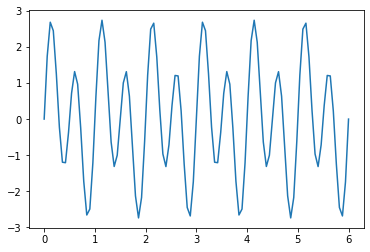

In [21]:
x = np.linspace(0, np.pi * 6, 101)

n = len(x)

L = max(x) - min(x)

y = 0. + 1.*np.sin(x * 2) + 2.*np.sin(x * 4 ) #+ np.sin(x * 25.5)

#y = 1.0 * np.random.randn(len(x))

#x = np.linspace(-10, 10, 101)
#y = 5*np.exp(-10*x**2) * 0.

#y[x>-1.]=1
#y[x>1.]=0

#y[x>np.pi * 2] = 0.

#y[x>np.pi * 4] = 0.5 *np.sin(x [x>np.pi * 4]* 5)

print (x/(np.pi))

plt.plot(x/np.pi, y)

## Автокорреляционная функция

1.5369023279598125e-16


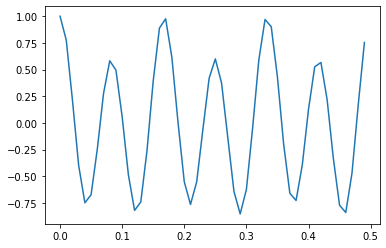

In [22]:
Ac = np.zeros (n)

y_av = np.sum(y)/n

print (y_av)

for k in range (0, n-1):
    
    Ac [k] = 0.
    
    for i in range (0, n-k-1):
        Ac[k] = Ac[k] + (y[i]-y_av)*(y[i+k]-y_av)/(n-k-1)
        
plt.plot (x[0:int(n/2)]/L, Ac[0:(int(n/2))]/Ac[0])       


# Оконное преобразование Фурье

## Исходные данные

In [23]:
xv = np.linspace(0, np.pi * 9, 15)

In [24]:
nv = len(xv)

In [25]:
Lv = max(xv) - min(xv)

In [26]:
yv = 0. + np.exp(np.cos(xv*2))

In [27]:
yv[xv > np.pi* 3] = 0.

In [28]:
yv[xv > np.pi* 6] = 1. * np.cos(xv [xv > np.pi* 6]* 7)

[0.         0.64285714 1.28571429 1.92857143 2.57142857 3.21428571
 3.85714286 4.5        5.14285714 5.78571429 6.42857143 7.07142857
 7.71428571 8.35714286 9.        ]


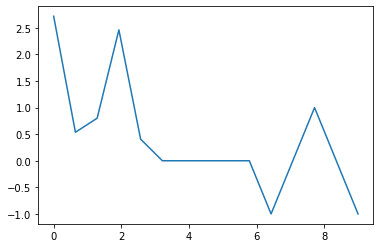

In [29]:
print (xv/(np.pi))

plt.plot(xv/np.pi, yv)

In [30]:
n

101

IndexError: index 90 is out of bounds for axis 0 with size 29

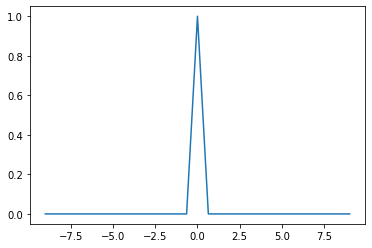

In [32]:
Bv = np.zeros ((nv))

dxv = Lv / (nv-1)
Winv = np.zeros ((2*nv-1))
xwv = np.linspace(-Lv, Lv, len(Winv))



WinSizev = np.pi/2 #L #/3

Winv[abs(xwv)<WinSizev] = 1.

plt.figure()
plt.plot (xwv/np.pi, Winv)

s = 11

for i in range (0,nv-1):
             
    Bv[i] = yv[i] * Winv[i-s+n]                        
       
plt.figure ()    
plt.plot (xv/np.pi, Bv)


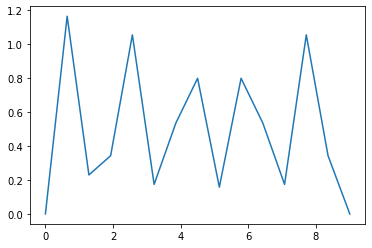

In [95]:
av = np.zeros ((len(xv)))
bv = np.zeros ((len(xv)))
Av = np.zeros ((len(xv)))

CosTerm = np.zeros ((len(xv)))
SinTerm = np.zeros ((len(xv)))

k = 2

for s in range (0,nv-1): 
    
    av[s]=0.
    bv[s]=0.
       
    for i in range (0,n-1):
    
        av[s] +=  2./ WinSize /2 * yv[i] * Winv[i-s+n] * np.cos(2*np.pi*xv[i]/Lv * k) * dxv 
        bv[s] +=  2./ WinSize /2 * yv[i] * Winv[i-s+n] * np.sin(2*np.pi*xv[i]/Lv * k) * dxv 
        
        
plt.figure()
plt.plot(xv/np.pi, (av**2+bv**2)**0.5)

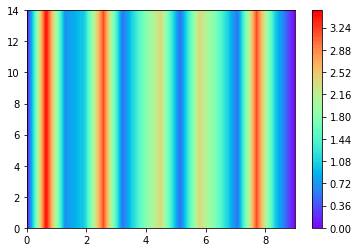

In [96]:
nfv = 15

a2v = np.zeros((nv,nfv))
b2v = np.zeros((nv,nfv))
A2v = np.zeros((nv,nfv))

Freqv = np.zeros ((len(xv)))
Shiftv = np.zeros ((len(xv)))

CosTermv = np.zeros ((len(xv)))
SinTermv = np.zeros ((len(xv)))

for k in range (0,nfv):
    
    Freqv [k] = k

    for s in range (0,nv-1):
        
        Shiftv[s] = s
    
        a2v[s,k]=0.
        b2v[s,k]=0.
       
        for i in range (0,nv-1):
    
            a2v[s,k] +=  2./ WinSizev /2 * yv[i] * Winv[i-s+n] * np.cos(2*np.pi*xv[i]/Lv * k) * dxv 
            b2v[s,k] +=  2./ WinSizev /2 * yv[i] * Winv[i-s+n] * np.sin(2*np.pi*xv[i]/Lv * k) * dxv
        
                                   
A2v = (a2v**2+b2v**2)**0.5 


plt.figure()
plt.contourf(xv/np.pi, Freqv[0:15], A2v.T, 100, cmap='rainbow')
plt.colorbar()

тема для курсовой - вейвлет анализ

[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96 1.02 1.08 1.14 1.2  1.26 1.32 1.38 1.44 1.5  1.56 1.62
 1.68 1.74 1.8  1.86 1.92 1.98 2.04 2.1  2.16 2.22 2.28 2.34 2.4  2.46
 2.52 2.58 2.64 2.7  2.76 2.82 2.88 2.94 3.   3.06 3.12 3.18 3.24 3.3
 3.36 3.42 3.48 3.54 3.6  3.66 3.72 3.78 3.84 3.9  3.96 4.02 4.08 4.14
 4.2  4.26 4.32 4.38 4.44 4.5  4.56 4.62 4.68 4.74 4.8  4.86 4.92 4.98
 5.04 5.1  5.16 5.22 5.28 5.34 5.4  5.46 5.52 5.58 5.64 5.7  5.76 5.82
 5.88 5.94 6.  ]


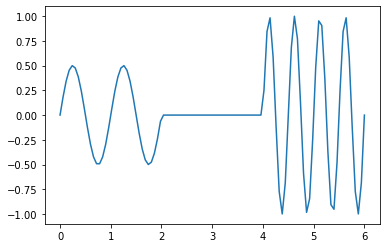

In [4]:
x = np.linspace(0, np.pi * 6, 101)

n = len(x)

L = max(x) - min(x)

y = 0. + 0.5*np.sin(x * 2) #+ 2.*np.sin(x * 4 ) #+ np.sin(x * 25.5)

y[x>np.pi * 2] = 0.

y[x>np.pi * 4] = 1. *np.sin(x [x>np.pi * 4]* 4)

print (x/(np.pi))

plt.plot(x/np.pi, y)

## Подвижное окно

In [27]:
n

101

In [28]:
len(Win)

201

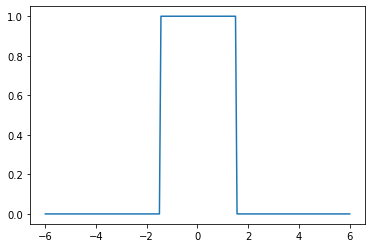

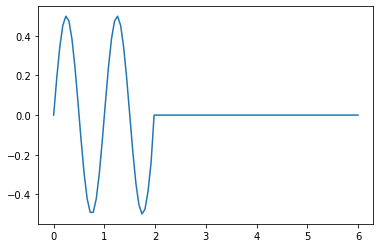

In [36]:
B = np.zeros ((n))

dx = L / (n-1)

xw = np.linspace(-L, L, 201)

Win = np.zeros ((2*n-1))

WinSize = 3*np.pi/2 #L #/3

Win[abs(xw)<WinSize] = 1.

plt.figure()
plt.plot (xw/np.pi, Win)

s = 8

for i in range (0,n-1):
             
    B[i] = y[i] * Win[i-s+n]                        
       
plt.figure ()    
plt.plot (x/np.pi, B)


## Оконное преобразование 1

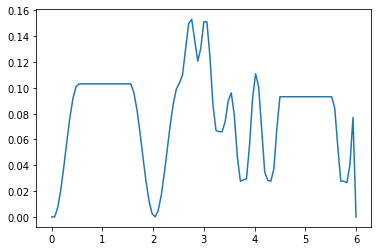

In [37]:
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

k = 2

for s in range (0,n-1): 
    
    a[s]=0.
    b[s]=0.
       
    for i in range (0,n-1):
    
        a[s] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.cos(2*np.pi*x[i]/L * k) * dx 
        b[s] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.sin(2*np.pi*x[i]/L * k) * dx 
        
        
plt.figure()
plt.plot(x/np.pi, (a**2+b**2)**0.5)
    

## Оконное преобразование 2

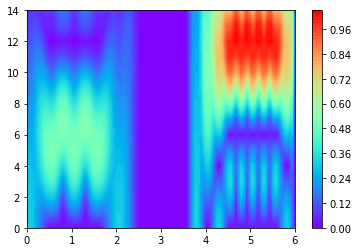

In [38]:
nf = 15

a2 = np.zeros((n,nf))
b2 = np.zeros((n,nf))
A2 = np.zeros((n,nf))

Freq = np.zeros ((len(x)))
Shift = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

for k in range (0,nf):
    
    Freq [k] = k

    for s in range (0,n-1):
        
        Shift[s] = s
    
        a2[s,k]=0.
        b2[s,k]=0.
       
        for i in range (0,n-1):
    
            a2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.cos(2*np.pi*x[i]/L * k) * dx 
            b2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.sin(2*np.pi*x[i]/L * k) * dx
        
                                   
A2 = (a2**2+b2**2)**0.5 


plt.figure()
plt.contourf(x/np.pi, Freq[0:15], A2.T, 100, cmap='rainbow')
plt.colorbar()